# Precision, Recall, F1

## Import Libraries

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

## Load MNIST

In [31]:
mnist = fetch_openml("mnist_784", version = 1, as_frame = False)

C:\Users\ayush\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [41]:
X, y = mnist['data'], mnist['target']

# Convert labels to integers
y = y.astype(int)

# Binary Classification is digit 5 or not
y_5 = (y==5)

X


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

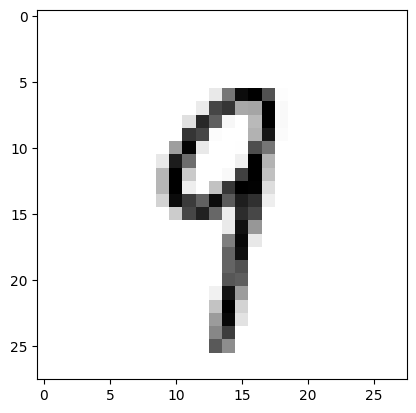

In [43]:

x_rand = X[900]
X_rand = x_rand.reshape(28, 28)
plt.imshow(X_rand, cmap = plt.cm.binary, interpolation = 'nearest')

#### Split the data into train and test

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y_5 , test_size = 0.2, random_state = 42)

In [11]:
X_train, y_train, X_test, y_test

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([ True, False, False, ..., False, False, False]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([False, False, False, ..., False, False, False]))

## Train a simple classifier

In [14]:
sgd_clf = SGDClassifier(random_state=42)

sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

## Predictions

In [15]:
y_pred = sgd_clf.predict(X_test)

## Confusion Matrix

In [17]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[12620,   107],
       [  334,   939]], dtype=int64)

In [21]:
TN, FP,TP,FN = conf_mat.ravel()

print("False Positive is", FP)
print("False Negative is", FN)

False Positive is 107
False Negative is 939


## Precision and Recall, F1

In [22]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

precision, recall

(0.8977055449330784, 0.7376276512175962)

In [24]:
# When model says "this is a 5"
print("Out of predicted 5s, how many were wrong?")
print(FP, "false alarms")

# Out of actual 5s
print("Out of real 5s, how many did we miss?")
print(FN, "missed cases")


Out of predicted 5s, how many were wrong?
107 false alarms
Out of real 5s, how many did we miss?
939 missed cases


In [47]:
f1 = f1_score(y_test,y_pred)
print("F1 score is :", f1)

F1 score is : 0.8098318240620959
